In [225]:
import xgboost
import shap
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

In [226]:
df = pd.read_csv("data_feature.csv")
df

,frame,cls,r_mean,g_mean,b_mean,r_range,g_range,b_range,r_var,g_var,...,g_skewness,b_skewness,r_kurtosis,g_kurtosis,b_kurtosis,luminance,xmin,xmax,ymin,ymax
0,10803,0,64.928267,58.074811,61.582150,249,255,254,2355.670596,2500.595571,...,1.196594,0.990761,1.001988,0.638622,0.117479,59.784049,105,281,238,310
1,10803,0,138.997637,124.954700,114.533424,255,255,255,5666.912828,5518.423918,...,-0.152255,-0.159831,-1.404527,-1.323314,-1.094660,127.187450,356,480,282,538
2,10803,0,97.098447,88.644178,86.850476,252,255,255,4424.019261,4590.634355,...,0.841100,0.714087,-0.304263,-0.349028,-0.557364,90.311384,281,625,203,352
3,10803,0,107.192779,91.544487,88.218246,209,192,193,2574.915770,2562.648408,...,0.239058,0.206782,-1.242052,-1.313084,-1.232371,94.629927,1089,1122,148,242
4,10803,0,105.371599,96.455215,96.100057,224,236,238,1415.344057,1460.645954,...,0.804296,0.731621,0.029867,0.521455,0.768797,98.324340,1052,1088,146,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,11016,0,86.684028,70.076389,64.145833,193,181,181,3059.875856,2850.542776,...,1.224627,1.210468,0.025189,0.005563,0.028951,73.177919,945,961,154,190
724,11016,0,102.333998,93.595966,92.582890,247,244,239,1645.663933,1882.914106,...,0.956812,1.096345,0.374047,0.554085,1.084402,95.379755,1032,1079,146,242
725,11016,0,119.870258,113.127946,109.607969,242,250,254,4990.736029,5148.588344,...,0.395233,0.325274,-1.165831,-1.070169,-1.049301,114.306897,694,748,210,375
726,11016,0,115.791870,105.113008,95.369106,131,143,138,1241.403836,1303.241701,...,-0.043394,-0.003271,-1.309186,-1.316035,-1.288657,106.679731,885,915,247,288


### Load X and y for training the classifier

In [227]:
X = df.drop(labels=['frame','cls'],axis=1)
y = df['cls']

observe a big difference between class = 0 and class = 1, hence this is a very imbalanced dataset for classification problem.

In [228]:
Counter(y)

Counter({0: 659, 1: 69})

Now introduce SMOTE resampling for balancing the data:

In [229]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

The classes are now balanced:

In [230]:
from collections import Counter
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 659, 1: 659})


In [231]:
model = xgboost.XGBClassifier().fit(X, y)

In [232]:
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

### Summary plots:

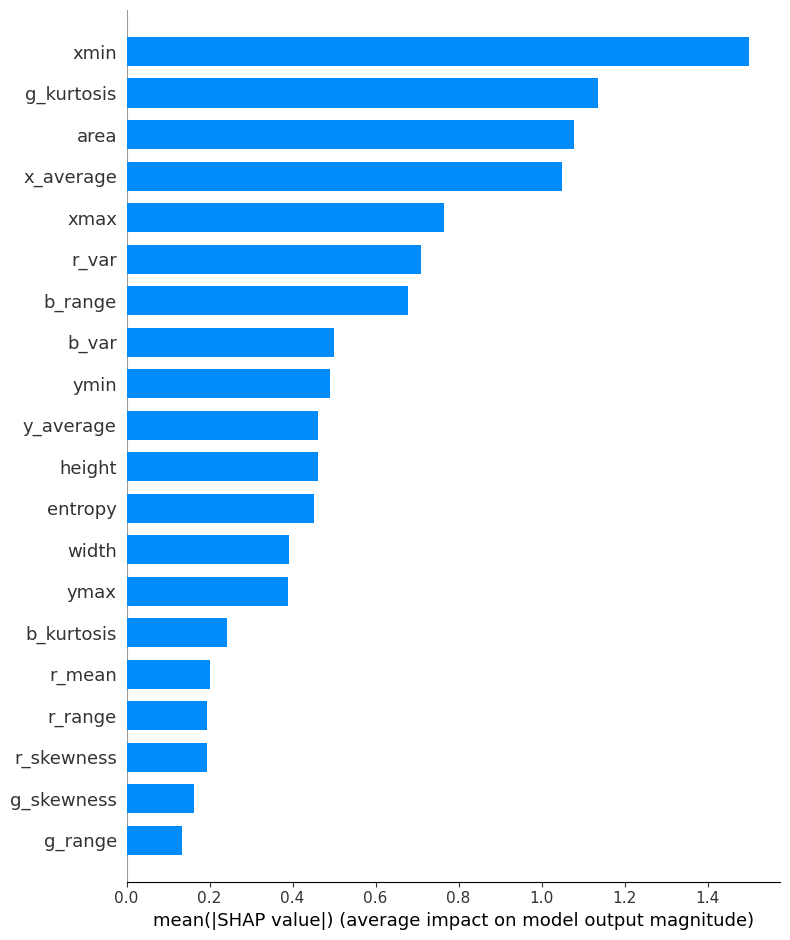

In [233]:
shap.initjs()
shap.summary_plot(shap_values, X, plot_type="bar")

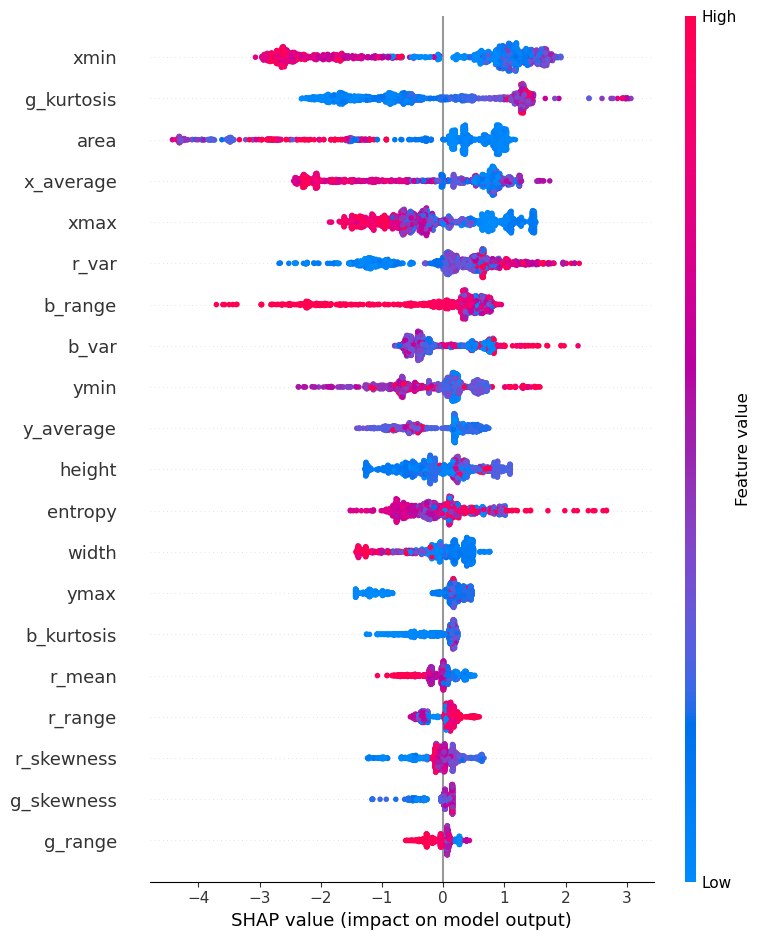

In [234]:
shap.summary_plot(shap_values, X)

### Plot for individual prediction:

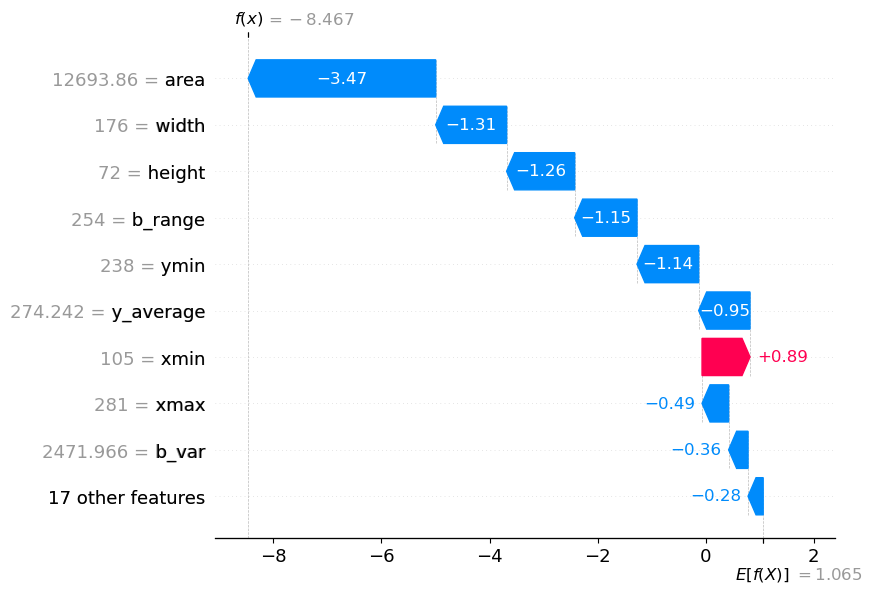

In [237]:
shap.plots.waterfall(shap_values[0])

In [236]:
shap.
shap.plots.force(shap_values[0])